# Data Preparation

### Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import pointbiserialr,f_oneway
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

### Loading the Data

In [2]:
medical_data = pd.read_csv('medical_clean.csv')
medical_data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In this section, we're going to prepare the data for analysis.

1. The info() method is called on medical_data to get a concise summary of the DataFrame. This provides information on the total number of entries, columns, data types, and potential missing values.

2. Columns are renamed for clarity. For instance, 'Item1' is renamed to 'Timely_admis', 'Item2' to 'Timely_treat', and so on. This makes it easier to interpret the data.

3. Columns that are not directly relevant to the analysis, such as 'CaseOrder', 'Customer_id', and 'Interaction', are dropped from the DataFrame.

In [3]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
medical_data.rename(columns={'Item1':'Timely_admis','Item2':'Timely_treat','Item3':'Timely_visits','Item4':'Reliability','Item5':'Options','Item6':'Hrs_treat','Item7':'Courteous','Item8':'Active_listen'},inplace=True)
medical_data.drop(columns = ['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Area','TimeZone','Job'],inplace = True)

### Data Type Conversion

Columns in the dataset are converted to more appropriate data types:

- 'Age' and 'Population' columns are converted to float64.
- 'Gender' is mapped to numerical categories and converted to int64.
- The 'Complication_risk' column is mapped to numerical values: 'Low' to 1, 'Medium' to 2, and 'High' to 3.
- 'Initial_admin' is mapped to numerical categories, with 'Emergency Admission' as 1, 'Elective Admission' as 2, and 'Observation Admission' as 3.
- 'Services' is also mapped to numerical categories corresponding to types of services.
- The 'Marital' column is transformed to indicate whether a patient has 'Never Married' or not.

In [5]:
medical_data['Age']=medical_data['Age'].astype('float64')
medical_data['Population'] = medical_data['Population'].astype('float64')
medical_data['Complication_risk'] = medical_data['Complication_risk'].map({'Low': 1, 'Medium': 2, 'High': 3})
medical_data['Initial_admin'] = medical_data['Initial_admin'].map({'Emergency Admission':1,'Elective Admission':2,'Observation Admission':3})
medical_data['Services'] = medical_data['Services'].map({'Blood Work':1,'Intravenous':2,'CT Scan':3,'MRI':4})
medical_data['Marital'] = medical_data['Marital'].map(lambda x: 'Yes' if x == 'Never Married' else 'No')
medical_data['Gender'] = (medical_data['Gender'].map({'Male':1,'Female':2,'Nonbinary':3})).astype('int64')
medical_data

,Population,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,...,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen
0,2951.0,1,53.0,86575.93,No,1,No,19.141466,6,0,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,11303.0,3,51.0,46805.99,No,2,No,18.940352,4,2,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,17125.0,3,53.0,14370.14,No,2,No,18.057507,4,1,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,2162.0,0,78.0,39741.49,No,1,No,16.576858,4,1,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5287.0,1,22.0,1209.56,No,2,No,17.439069,5,0,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4762.0,2,25.0,45967.61,No,1,No,16.980860,4,2,...,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,1251.0,4,87.0,14983.02,No,1,Yes,18.177020,5,0,...,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,532.0,3,45.0,65917.81,No,2,Yes,17.129070,4,2,...,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,271.0,3,43.0,29702.32,No,1,Yes,19.910430,5,2,...,7644.483000,7781.678000,5,5,3,4,4,3,4,3


## Summary Statistics

Variables are categorized into 'continuous' and 'categorical' based on their data type.
The describe() method is used to generate summary statistics, including count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum.

In [6]:
continuous_vars = medical_data.select_dtypes(include='float64').columns
cols = set(medical_data.columns)
num = set(medical_data.select_dtypes(include='float64').columns)
obj = cols.difference(num)
categorical_vars = medical_data[list(obj)].columns

In [7]:
continuous_vars

Index(['Population', 'Age', 'Income', 'VitD_levels', 'Initial_days',
       'TotalCharge', 'Additional_charges'],
      dtype='object')

In [8]:
categorical_vars

Index(['Full_meals_eaten', 'Arthritis', 'Gender', 'Courteous',
       'Complication_risk', 'Reflux_esophagitis', 'Diabetes', 'Children',
       'Options', 'Overweight', 'Timely_treat', 'Timely_visits',
       'Initial_admin', 'HighBlood', 'Allergic_rhinitis', 'Doc_visits',
       'Hrs_treat', 'ReAdmis', 'Timely_admis', 'Soft_drink', 'BackPain',
       'Hyperlipidemia', 'Services', 'Stroke', 'vitD_supp', 'Active_listen',
       'Asthma', 'Reliability', 'Marital', 'Anxiety'],
      dtype='object')

In [9]:
medical_data[continuous_vars].describe()

,Population,Age,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9965.253800,53.511700,40490.495160,17.964262,34.455299,5312.172769,12934.528587
std,14824.758614,20.638538,28521.153293,2.017231,26.309341,2180.393838,6542.601544
min,0.000000,18.000000,154.080000,9.806483,1.001981,1938.312067,3125.703000
25%,694.750000,36.000000,19598.775000,16.626439,7.896215,3179.374015,7986.487755
50%,2769.000000,53.000000,33768.420000,17.951122,35.836244,5213.952000,11573.977735
75%,13945.000000,71.000000,54296.402500,19.347963,61.161020,7459.699750,15626.490000
max,122814.000000,89.000000,207249.100000,26.394449,71.981490,9180.728000,30566.070000


In [10]:
medical_data[categorical_vars].describe()

,Full_meals_eaten,Gender,Courteous,Complication_risk,Children,Options,Timely_treat,Timely_visits,Initial_admin,Doc_visits,Hrs_treat,Timely_admis,Services,vitD_supp,Active_listen,Reliability
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.001400,1.544600,3.494000,2.123300,2.097200,3.496900,3.506700,3.511100,1.737600,5.012200,3.522500,3.518800,1.672000,0.398900,3.509700,3.515100
std,1.008117,0.539296,1.021405,0.730172,2.163659,1.030192,1.034825,1.032755,0.825115,1.045734,1.032376,1.031966,0.832758,0.628505,1.042312,1.036282
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,0.000000,1.000000,3.000000,2.000000,0.000000,3.000000,3.000000,3.000000,1.000000,4.000000,3.000000,3.000000,1.000000,0.000000,3.000000,3.000000
50%,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,3.000000,4.000000,1.000000,5.000000,4.000000,4.000000,1.000000,0.000000,3.000000,4.000000
75%,2.000000,2.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,2.000000,6.000000,4.000000,4.000000,2.000000,1.000000,4.000000,4.000000
max,7.000000,3.000000,7.000000,3.000000,10.000000,7.000000,7.000000,8.000000,3.000000,9.000000,7.000000,8.000000,4.000000,5.000000,7.000000,7.000000


### Correlation Analysis for Continuous Variables

Generating heat map to visualize the Pearson correlation coefficients between continuous variables. This step helps in understanding the linear relationships between variables and identifying potential multicollinearity issues.

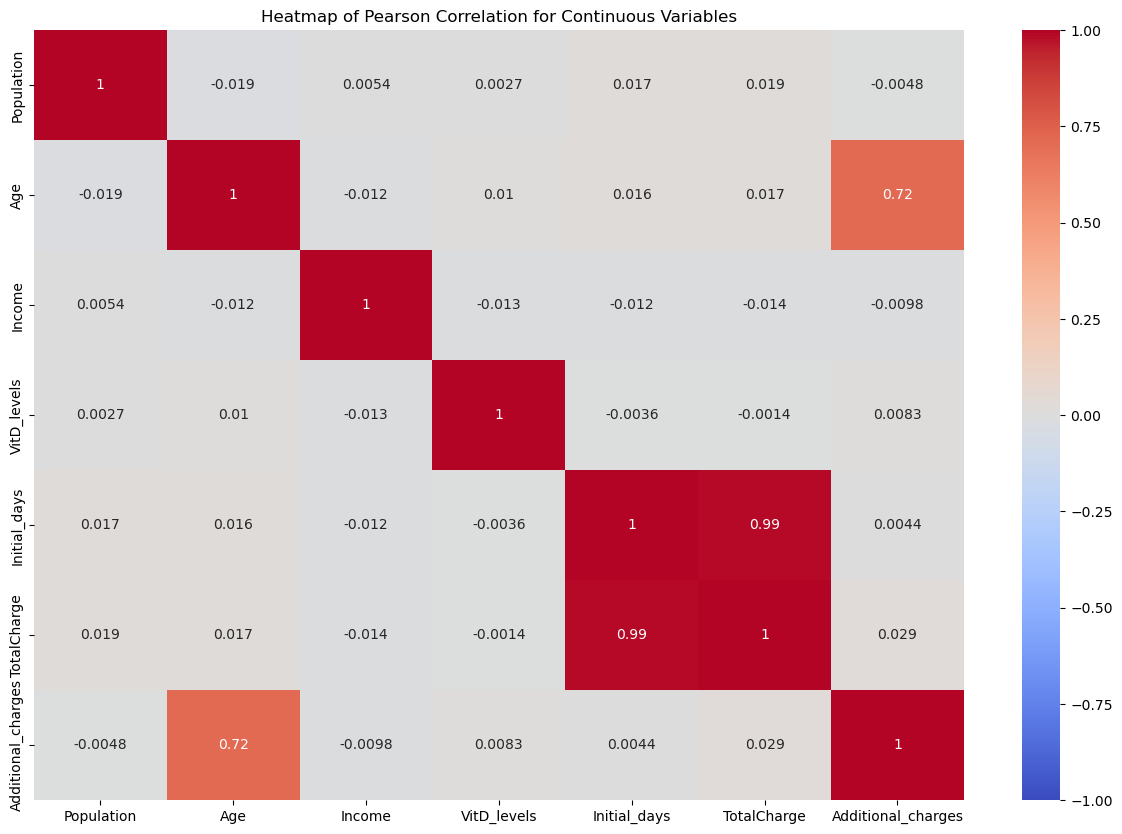

In [11]:
# Compute the correlation matrix for continuous variables
corr_matrix = medical_data[continuous_vars].corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Pearson Correlation for Continuous Variables')
plt.show()

This code identifies binary categorical variables, i.e., variables with only two distinct values ('Yes' and 'No'). These variables are then mapped to numerical values (1 for 'Yes' and 0 for 'No') to facilitate further analysis.

In [12]:
# Identifying binary categorical variables
binary_categorical_vars = [col for col in medical_data.columns if medical_data[col].nunique() == 2 and col not in continuous_vars]
# Mapping binary categorical variables: 'Yes' to 1 and 'No' to 0
for var in binary_categorical_vars:
    medical_data[var] = medical_data[var].map({'Yes': 1, 'No': 0})

### Point-Biserial Correlation Analysis

Given that we have binary categorical variables and a continuous target variable (Initial_days), the Point-Biserial Correlation is calculated for each binary variable against the target. This analysis provides insights into the linear relationship between each binary predictor and the target variable. The results indicate the strength and direction of the correlation.



In [13]:
# Calculate point-biserial correlation for binary categorical variables with 'Initial_days'
pointbiserial_correlations = {}
# Iterates over each variable in the list binary_categorical_vars 
for var in binary_categorical_vars:
# Calculates the Point-Biserial Correlation with the continuous target variable 
    correlation, p_value = pointbiserialr(medical_data[var], medical_data['Initial_days'])
    pointbiserial_correlations[var] = correlation

# Sorting the correlations for better visualization
sorted_pointbiserial = sorted(pointbiserial_correlations.items(), key=lambda x: x[1], reverse=True)

# Displaying the results
sorted_pointbiserial

[('ReAdmis', 0.8508616016470885),
 ('Arthritis', 0.018907397198913427),
 ('BackPain', 0.01734410874493187),
 ('Reflux_esophagitis', 0.01223655411789256),
 ('Anxiety', 0.011908314502358314),
 ('Marital', 0.008543704353557245),
 ('Allergic_rhinitis', 0.003635198306356234),
 ('Soft_drink', 0.002432128967148487),
 ('Stroke', -0.002042839231569394),
 ('Diabetes', -0.0024110823767566443),
 ('Hyperlipidemia', -0.003973755329801795),
 ('HighBlood', -0.006332679265873513),
 ('Overweight', -0.011077111328823733),
 ('Asthma', -0.013495745184334555)]

### Observations and Insights

Based on the Point-Biserial Correlation Analysis, the ReAdmis variable has a strong positive correlation with Initial_days. This suggests a significant linear relationship between patient readmission and their initial days of stay.The other variables may not be as strongly correlated, but they still offer useful information about potential relationships with the target variable.

Multivariate Categorical Variables

This code identifies multi-valued categorical variables and displays their details. These are variables with more than two distinct values, excluding the binary variables previously identified.

In [14]:
# Identifying categorical variables with more than two categories
multi_categorical_vars = [col for col in medical_data.columns if ((medical_data[col].dtype == 'object' or medical_data[col].dtype == 'int64') and col not in binary_categorical_vars)]
medical_data[multi_categorical_vars]

,Children,Gender,Doc_visits,Full_meals_eaten,vitD_supp,Initial_admin,Complication_risk,Services,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen
0,1,1,6,0,0,1,2,1,3,3,2,2,4,3,3,4
1,3,2,4,2,1,1,3,2,3,4,3,4,4,4,3,3
2,3,2,4,1,0,2,2,1,2,4,4,4,3,4,3,3
3,0,1,4,1,0,2,2,1,3,5,5,3,4,5,5,5
4,1,2,5,0,2,2,1,3,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,1,4,2,1,1,2,2,3,2,2,3,4,3,4,2
9996,4,1,5,0,0,2,2,3,3,3,4,2,5,3,4,4
9997,3,2,4,2,0,2,3,2,3,3,3,4,4,2,3,2
9998,3,1,5,2,1,1,2,1,5,5,3,4,4,3,4,3


### ANOVA for Multivariate Categorical Variables

Having identified multivariate categorical variables, the code performs the Analysis of Variance (ANOVA) for each of these variables against the target (Initial_days). The purpose here is to understand if the means of Initial_days are significantly different across the different categories of each variable. The results of the ANOVA are sorted by their p-values.

In [15]:
# Conducting ANOVA for each multi-categorical variable
anova_results = {}

# Iterates over each variable in the list multi_categorical_vars
for var in multi_categorical_vars:
    categories = list(medical_data[var].unique())
    data_groups = [medical_data['Initial_days'][medical_data[var] == category] for category in categories]
# Perform one-way ANOVA on the data groups. 
    f_stat, p_value = f_oneway(*data_groups) 
    anova_results[var] = p_value

# Sorting the results by p-value for better visualization
sorted_anova = sorted(anova_results.items(), key=lambda x: x[1])
# Displaying the results
sorted_anova

[('Children', 0.031869477713692494),
 ('Complication_risk', 0.16172508488386556),
 ('Timely_treat', 0.19308044562127796),
 ('Full_meals_eaten', 0.22338446823620084),
 ('vitD_supp', 0.2336619479738599),
 ('Hrs_treat', 0.37304534712335025),
 ('Timely_admis', 0.37830252584134455),
 ('Services', 0.4037148048285899),
 ('Doc_visits', 0.4260191939498694),
 ('Timely_visits', 0.4767044081782952),
 ('Initial_admin', 0.4810703648587771),
 ('Courteous', 0.6080380688768748),
 ('Reliability', 0.639173220606965),
 ('Gender', 0.6979896750162624),
 ('Active_listen', 0.7453342978967805),
 ('Options', 0.945576108731062)]

## Univariate Visualizations

This section focuses on visualizing the distribution of selected variables. These visualizations aid in understanding the data distribution and identifying potential outliers or patterns.

For categorical variables, bar plots are used, displaying the count of observations in each category.
For continuous variables, histograms are employed, showcasing the data distribution and highlighting potential skews or anomalies.

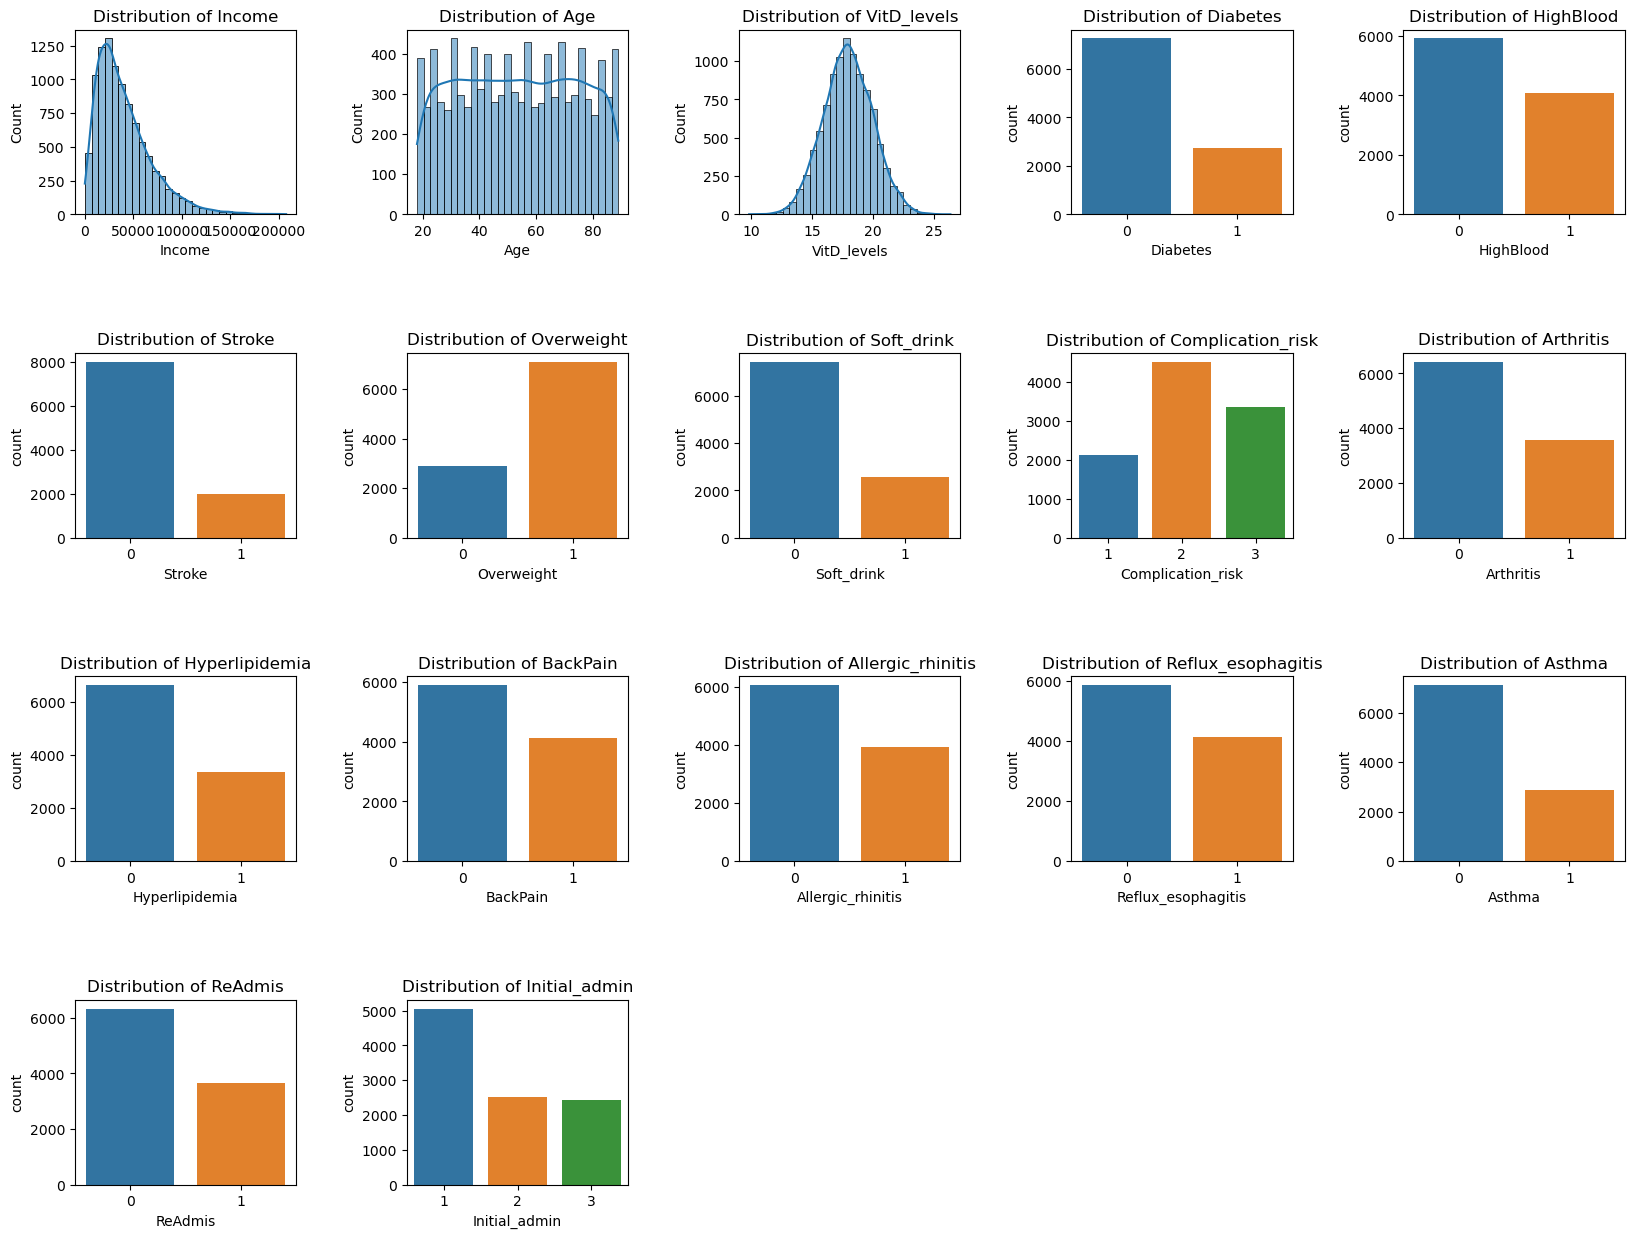

In [16]:
selected_vars = ['Income', 'Age', 'VitD_levels', 'Diabetes', 'HighBlood', 
          'Stroke', 'Overweight', 'Soft_drink', 'Complication_risk', 
          'Arthritis', 'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis', 
          'Reflux_esophagitis', 'Asthma', 'ReAdmis','Initial_admin']


# Creating univariate visualizations
plt.figure(figsize=(20, 15))
for i, var in enumerate(selected_vars, 1):
    plt.subplot(4, 5, i)
    if medical_data[var].dtype == 'int64':
        # Bar plot for categorical variables
        sns.countplot(data=medical_data, x=var)
    else:
        # Histogram for continuous variables
        sns.histplot(medical_data[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.subplots_adjust(hspace=.75,wspace=.5)

plt.show()

## Bivariate Visualizations

Bivariate visualizations help understand the relationship between two variables. In this section, the relationship between the selected predictor variables and the target variable (Initial_days) is visualized.

For relationships between categorical predictors and the continuous target, box plots are used. Box plots display the distribution of the continuous target across different categories, showing medians, quartiles, and potential outliers.
For continuous predictors against the continuous target, scatter plots are generated. These plots reveal potential linear or nonlinear relationships between variables.

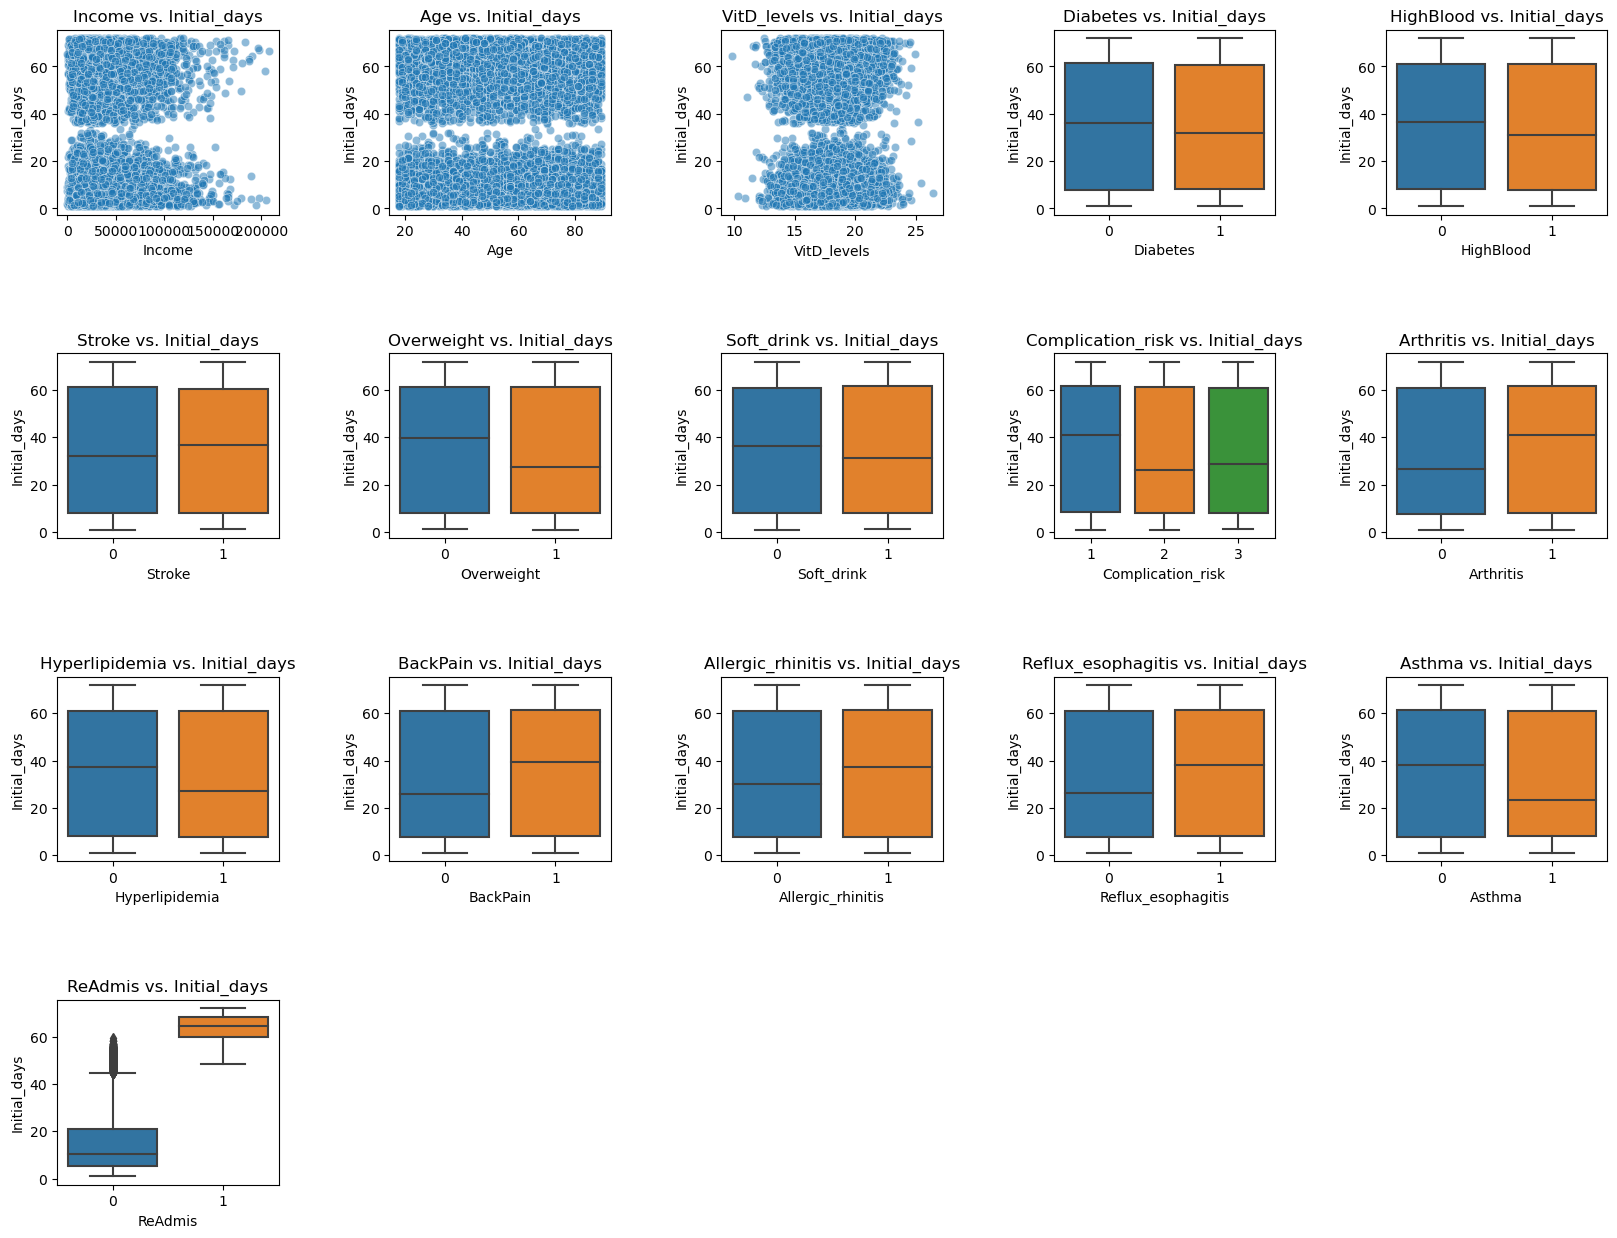

In [17]:
plt.figure(figsize=(20, 15))
for i, var in enumerate(selected_vars[:-1], 1):  # Excluding 'Initial_days' itself
    plt.subplot(4, 5, i)
    if medical_data[var].dtype == 'int64':
        # Box plot for categorical vs. continuous variables
        sns.boxplot(data=medical_data, x=var, y='Initial_days')
    else:
        # Scatter plot for continuous vs. continuous variables
        sns.scatterplot(data=medical_data, x=var, y='Initial_days', alpha=0.5)
    plt.title(f'{var} vs. Initial_days')
    plt.subplots_adjust(hspace=.75,wspace=.5)


plt.show()

## Transforming Data

## Data Transformation for Normality

Given the nature of regression analysis, it's important that our predictor variables are normally distributed. The code applies a logarithmic transformation to the Income column to achieve a more normal distribution. The transformed variable is stored in a new column Income_log.

After applying the transformation, the distributions of Income and Income_log are visualized using histograms, Q-Q plots, and box plots. These visualizations help with:
- Assessing the distribution and skewness (histogram).
- Determine how well the data fits a normal distribution (Q-Q plot).
- Identify potential outliers and get an overview of data spread (box plot).

In [18]:
# Applying transformations
medical_data['Income_log'] = np.log1p(medical_data['Income'])

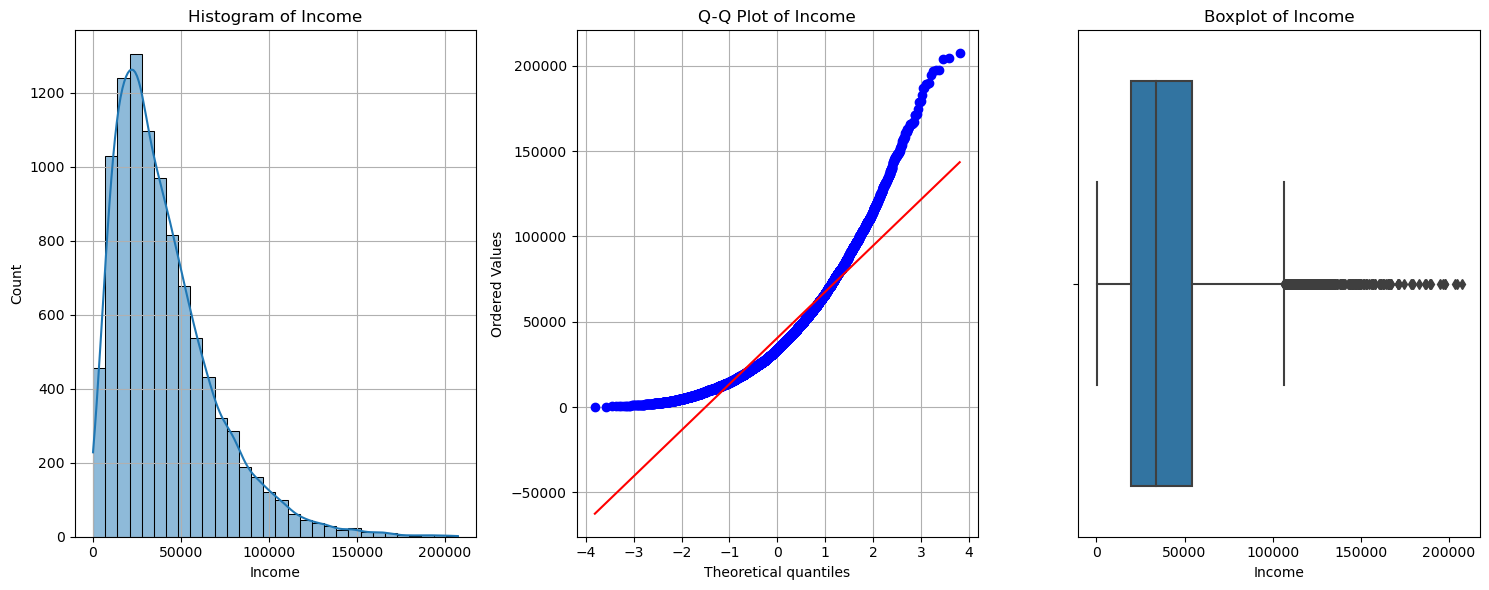

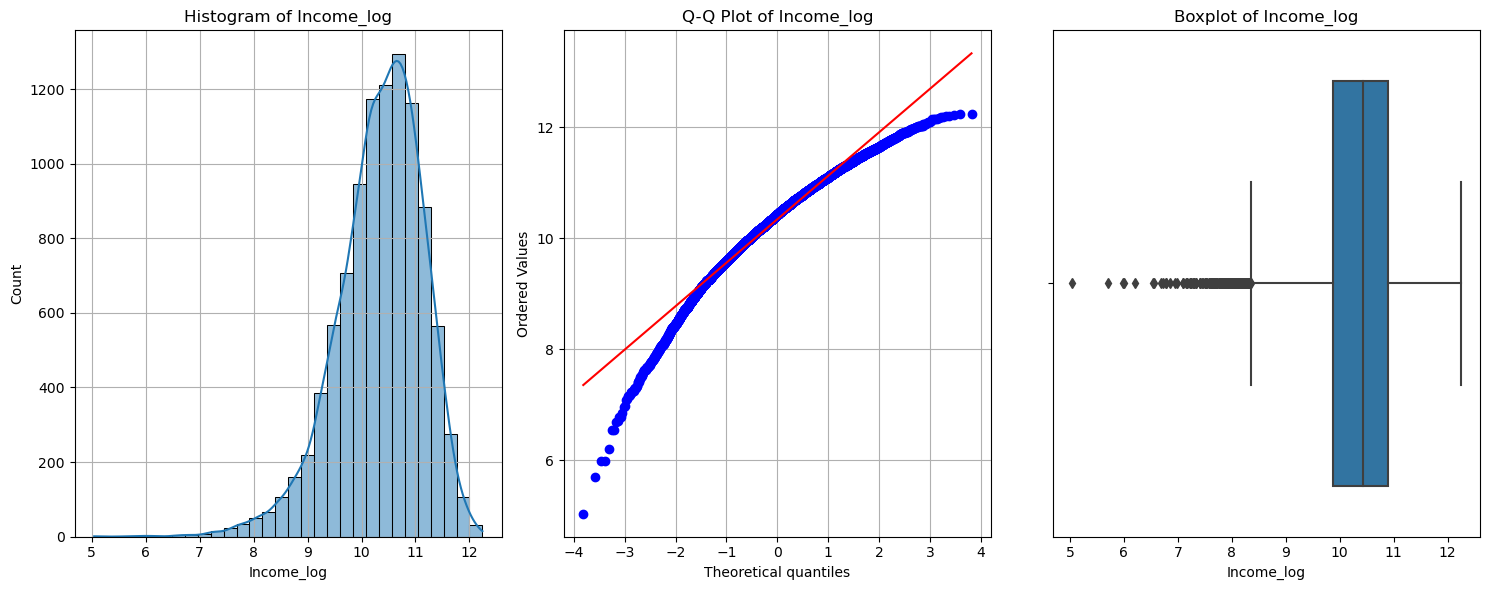

In [19]:
# Visualizing the distributions before and after transformation
transformed_vars = ['Income','Income_log']

for var in transformed_vars:
    plt.figure(figsize=(15, 6))
    
    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(medical_data[var], bins=30, kde=True)
    plt.title(f'Histogram of {var}')
    plt.grid(True)

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(medical_data[var], plot=plt)
    plt.title(f'Q-Q Plot of {var}')
    plt.grid(True)
    
    # Box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=medical_data[var])
    plt.title(f'Boxplot of {var}')

    plt.tight_layout()
    plt.show()

### Outlier Detection

The code uses two methods to identify outliers:

Z-Score: Any data point with an absolute z-score above 3 is considered an outlier.
Interquartile Range (IQR): Data points below Q1 − 1.5 × IQR or above 
Q3 + 1.5 × IQR are outliers, where Q1 and Q3 are the 25th and 75th percentiles, respectively.
The outlier detection is performed for selected columns, and the count of outliers detected by each method is displayed.

In [20]:
# Defining columns of interest
columns_of_interest = ['Age', 'Income', 'VitD_levels','Initial_days']

# Computing Z-Scores for outlier detection
z_scores = pd.DataFrame(stats.zscore(medical_data[columns_of_interest]))
abs_z_scores = np.abs(z_scores)
z_outliers_count = (abs_z_scores > 3).sum()

# Computing IQR for outlier detection
Q1 = medical_data[columns_of_interest].quantile(0.25)
Q3 = medical_data[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1
iqr_outliers_count = ((medical_data[columns_of_interest] < (Q1 - 1.5 * IQR)) | 
                      (medical_data[columns_of_interest] > (Q3 + 1.5 * IQR))).sum()
print('Z-Score Outliers')
display(z_outliers_count)
print('\nIQR Outliers')
display(iqr_outliers_count)

Z-Score Outliers


Age               0
Income          143
VitD_levels      24
Initial_days      0
dtype: int64


IQR Outliers


Age               0
Income          326
VitD_levels      60
Initial_days      0
dtype: int64

In [21]:
# Defining columns of interest
columns_of_interest = ['Income','Income_log']

# Computing Z-Scores for outlier detection
z_scores = pd.DataFrame(stats.zscore(medical_data[columns_of_interest]))
abs_z_scores = np.abs(z_scores)
z_outliers_count = (abs_z_scores > 3).sum()

# Computing IQR for outlier detection
Q1 = medical_data[columns_of_interest].quantile(0.25)
Q3 = medical_data[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1
iqr_outliers_count = ((medical_data[columns_of_interest] < (Q1 - 1.5 * IQR)) | 
                      (medical_data[columns_of_interest] > (Q3 + 1.5 * IQR))).sum()

print('Z-Score Outliers')
display(z_outliers_count)
print('\nIQR Outliers')
display(iqr_outliers_count)

Z-Score Outliers


Income        143
Income_log     94
dtype: int64


IQR Outliers


Income        326
Income_log    187
dtype: int64

In [22]:
medical_data[transformed_vars].describe()

,Income,Income_log
count,10000.000000,10000.000000
mean,40490.495160,10.342797
std,28521.153293,0.795449
min,154.080000,5.043941
25%,19598.775000,9.883273
50%,33768.420000,10.427311
75%,54296.402500,10.902232
max,207249.100000,12.241682


In [23]:
medical_data.to_csv('transformed_medical_data.csv',index = False)

# Model Comparison and Analysis

### Regression Model with Statsmodels

To gain a deeper understanding of the regression model, the code uses the statsmodels library. This provides a comprehensive summary of the regression output.

In [24]:
X = medical_data[['Income_log', 'Age','VitD_levels', 'Diabetes', 'HighBlood', 
          'Stroke', 'Overweight', 'Soft_drink', 'Complication_risk', 
          'Arthritis', 'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis', 
          'Reflux_esophagitis', 'Asthma', 'ReAdmis','Initial_admin']]
y = medical_data['Initial_days']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the linear regression model
lin_reg = LinearRegression();
lin_reg.fit(X_train, y_train);

# Predicting on the test data
y_pred=lin_reg.predict(X_test)    

This detailed summary assists in interpreting the significance of each predictor and the overall goodness-of-fit of the model.

In [25]:
# Fit the model with statsmodels to get detailed summary
model_sm = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Display the model summary
model_summary = model_sm.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     1257.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:31:18   Log-Likelihood:                -32313.
No. Observations:                8000   AIC:                         6.466e+04
Df Residuals:                    7982   BIC:                         6.479e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 21.6275      2.564      8.434      0.000      16.601      26.654
Income_log            -0.2698      0.193     -1.399      0.162      -0.648       0.108
Age                    0.0039      0.007      0.525      0.599      -0.011       0.019
VitD_levels           -0.1139      0.076     -1.490      0.136      -0.264       0.036
Diabetes              -0.2519      0.346     -0.728      0.467      -0.930       0.426
HighBlood             -0.3459      0.313     -1.104      0.270      -0.960       0.268
Stroke                 0.1945      0.386      0.504      0.614      -0.563       0.952
Overweight            -0.1661      0.338     -0.492      0.623      -0.828       0.496
Soft_drink            -0.2901      0.351     -0.826      0.409      -0.979       0.398
Complication_risk     -0.5677      0.212     -2.684      0.007      -0.982      -0.153
Arthritis              0.6076      0.320      1.896      0.058      -0.021       1.236
Hyperlipidemia        -0.3745      0.324     -1.155      0.248      -1.010       0.261
BackPain               0.3559      0.313      1.136      0.256      -0.259       0.970
Allergic_rhinitis      0.4076      0.315      1.292      0.196      -0.211       1.026
Reflux_esophagitis     0.4498      0.313      1.438      0.151      -0.164       1.063
Asthma                 0.2037      0.339      0.600      0.548      -0.462       0.869
ReAdmis               46.5087      0.319    145.872      0.000      45.884      47.134
Initial_admin          0.7369      0.187      3.947      0.000       0.371       1.103
==============================================================================
Omnibus:                     1615.336   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2786.566
Skew:                           1.345   Prob(JB):                         0.00
Kurtosis:                       4.063   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Backward Elimination for Feature Selection

Backward elimination is a stepwise regression technique used for feature selection. The process involves:
- Fitting the model using all predictors.
- Evaluating the predictor with the highest p-value.
    - If this p-value is greater than a given significance level (in this case, 0.05), the predictor is removed.
- Repeating the process until all predictors have p-values below the significance level.
This approach ensures that only statistically significant predictors are included in the final model.

* The function initiates a loop that can run up to the number of columns (features) in X.
* For each iteration, an OLS regression model is fit using the remaining features in X and the target variable y.
* The add_constant function is used to add an intercept term to the model.
* From the regression model, the p-values of all features are obtained, and the feature with the maximum p-value is identified.
* If no feature has a p-value exceeding the significance level, the loop breaks, and the function returns the remaining features.

In [26]:
def backward_elimination(X, y, significance_level=0.05):
    num_vars = len(X.columns)
    for i in range(0, num_vars):
        regressor_OLS = sm.OLS(y, sm.add_constant(X)).fit()
        max_p_value = max(regressor_OLS.pvalues)
        if max_p_value > significance_level:
            remove = regressor_OLS.pvalues.idxmax()
            X = X.drop(remove, axis=1)
        else:
            break
            
    return X.columns

# Applying backward elimination on the training data
selected_features = backward_elimination(X_train, y_train)
selected_features

Index(['Complication_risk', 'ReAdmis', 'Initial_admin'], dtype='object')

### Refined Regression Model

This code trains the regression model only including significant predictors.The refined model is again evaluated using statsmodels to obtain a detailed summary.

In [27]:
# Using only the significant predictors after backward elimination
X_train_refined = X_train[selected_features]
X_test_refined = X_test[selected_features]

# Instantiating the regression model
lm_refined = LinearRegression()

# Fitting the refined model on the training data
lm_refined.fit(X_train_refined, y_train);

# Fit the model with statsmodels to get detailed summary
model_sm = sm.OLS(y_train, sm.add_constant(X_train_refined)).fit()

# Display the model summary
model_summary = model_sm.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     7114.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:31:19   Log-Likelihood:                -32321.
No. Observations:                8000   AIC:                         6.465e+04
Df Residuals:                    7996   BIC:                         6.468e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                17.2995      0.588     29.436      0.000      16.147      18.452
Complication_risk    -0.5864      0.211     -2.774      0.006      -1.001      -0.172
ReAdmis              46.5305      0.319    146.044      0.000      45.906      47.155
Initial_admin         0.7425      0.187      3.981      0.000       0.377       1.108
==============================================================================
Omnibus:                     1623.255   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2807.676
Skew:                           1.349   Prob(JB):                         0.00
Kurtosis:                       4.071   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual Analysis

The residuals (differences between observed and predicted values) are calculated and visualized in three ways:

- Histogram of Residuals: Provides an overview of the distribution of residuals. Ideally, residuals should be normally distributed.
- Scatterplot of Predicted Values vs. Residuals: Helps check the assumption of homoscedasticity, i.e., the variance of residuals should be constant across predicted values. The plot should not display any clear patterns.
- Q-Q Plot of Residuals: Compares the distribution of residuals to a normal distribution. Data points should roughly follow the 45-degree line for the residuals to be considered normally distributed.

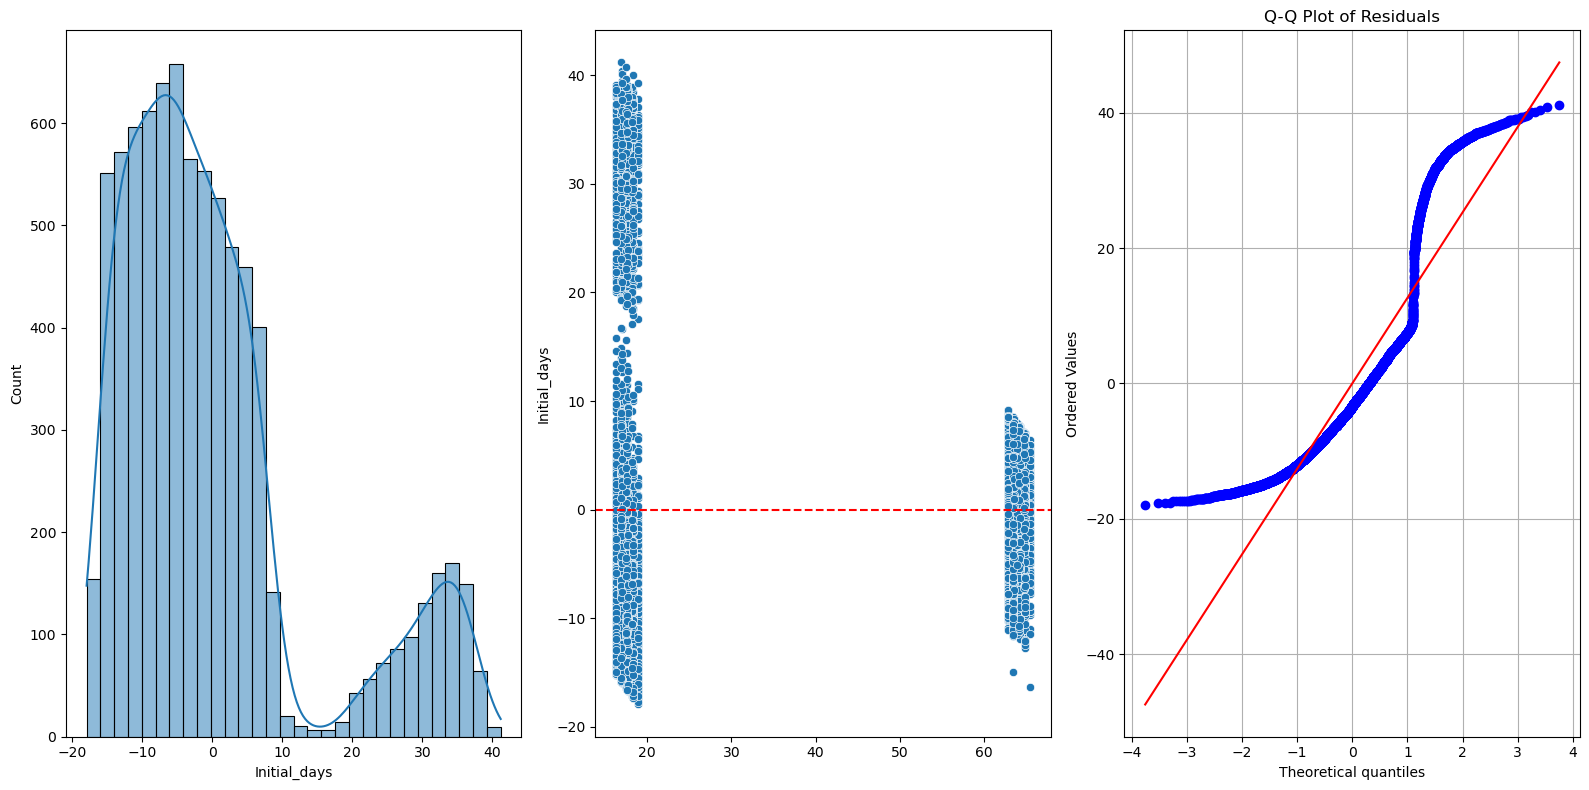

In [28]:
# Calculating residuals for the training dataset
y_train_pred = lm_refined.predict(X_train_refined)
residuals = y_train - y_train_pred

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(16, 8))


# Histogram of residuals
sns.histplot(residuals, bins=30, kde=True,ax=ax[0])
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

# Scatterplot of predicted values vs residuals
sns.scatterplot(x=y_train_pred, y=residuals,ax=ax[1])
ax[1].axhline(y=0, color='red', linestyle='--')
plt.title('Predicted Values vs. Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Q-Q plot
plt.subplot(1, 3, 3)
ax[2]=stats.probplot(x=residuals, plot=plt)
plt.title(f'Q-Q Plot of Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()